In [0]:
import torch

In [0]:
import pandas as pd
import glob
import numpy as np

In [0]:
li = []
for filename in glob.glob("*.tsv"):
    df = pd.read_csv(filename, sep="\t")
    li.append(df)

In [0]:
data = pd.concat(li, axis=0, ignore_index=True)

In [0]:
train_set = data[:1000]
test_set = data[1000:]

In [0]:
data['Target sequence'][0]

'TTGCGTAATCTTGTGAGAGTCGG'

In [0]:
data['Efficiency']

0       59.78
1       38.36
2       58.56
3       62.58
4       60.03
        ...  
1182    48.42
1183    29.75
1184    52.38
1185    38.71
1186    46.64
Name: Efficiency, Length: 1187, dtype: float64

In [0]:
def transform_sequence(seq):
    m = np.zeros((len(seq), 4))
    for i, char in enumerate(seq):
        if char == 'A':
            m[i][0] = 1
        elif char == 'T':
            m[i][1] = 1
        elif char == 'C':
            m[i][2] = 1
        elif char == 'G':
            m[i][3] = 1
    m = m.reshape(m.shape[0]*m.shape[1])
    return m

In [0]:
transform_sequence(data['Target sequence'][0]).shape

(92,)

In [0]:
data['Target sequence'].values

array(['TTGCGTAATCTTGTGAGAGTCGG', 'CACACATACGTCCGTGCTGCTGG',
       'GCTCCCTCTAGTGCTTTGGTTGG', ..., 'CATTGAGAGCCGTGTGCCGAAGG',
       'ACACGGCTCTCAATGACATTTGG', 'TCAAAACTTTTTCCTATGAAGGG'], dtype=object)

In [0]:
transform_sequence(data['Target sequence'].values)

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
class GeneDataset(object):
    def __init__(self, data):
        self.target_sequence = data['Target sequence'].values
        self.efficiency = data['Efficiency'].values
    
    def __getitem__(self, idx):
        seq = torch.as_tensor(transform_sequence(self.target_sequence[idx]), dtype=torch.float32)
        eff = torch.as_tensor(self.efficiency[idx] / 100, dtype=torch.float32)
        return seq, eff
    
    def __len__(self):
        return len(self.target_sequence)
    
        

In [0]:
dataset = GeneDataset(train_set)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64,
                                          shuffle=True, num_workers=2)

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(92, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        return x

net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
loss_list = []
for epoch in range(500):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, ele in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        seq, eff = ele
#         print(ele)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(seq)
#         print("outputs", outputs, "eff", eff)
        loss = criterion(outputs[:, 0], eff)
#         print("loss", loss)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    loss_list.append(running_loss)
    print("Epoch {} ,loss: {}".format(epoch, running_loss))
    
print('Finished Training')
# train_time[8] = time.time() - now

Epoch 0 ,loss: 0.2866292465478182
Epoch 1 ,loss: 0.28753603156656027
Epoch 2 ,loss: 0.28428242821246386
Epoch 3 ,loss: 0.28275914303958416
Epoch 4 ,loss: 0.28330648597329855
Epoch 5 ,loss: 0.27939253859221935
Epoch 6 ,loss: 0.27820256911218166
Epoch 7 ,loss: 0.2808317616581917
Epoch 8 ,loss: 0.2760666646063328
Epoch 9 ,loss: 0.27886362466961145
Epoch 10 ,loss: 0.2764633595943451
Epoch 11 ,loss: 0.2761112954467535
Epoch 12 ,loss: 0.2777048172429204
Epoch 13 ,loss: 0.27441755030304193
Epoch 14 ,loss: 0.2753773294389248
Epoch 15 ,loss: 0.27464829478412867
Epoch 16 ,loss: 0.27307458873838186
Epoch 17 ,loss: 0.27233314141631126
Epoch 18 ,loss: 0.2700838977470994
Epoch 19 ,loss: 0.26985269971191883
Epoch 20 ,loss: 0.27001894265413284
Epoch 21 ,loss: 0.26833157055079937
Epoch 22 ,loss: 0.27039675787091255
Epoch 23 ,loss: 0.2708115689456463
Epoch 24 ,loss: 0.27060389425605536
Epoch 25 ,loss: 0.2678388711065054
Epoch 26 ,loss: 0.2674708291888237
Epoch 27 ,loss: 0.2661264445632696
Epoch 28 ,loss

Epoch 226 ,loss: 0.07061687810346484
Epoch 227 ,loss: 0.07054105121642351
Epoch 228 ,loss: 0.07032598345540464
Epoch 229 ,loss: 0.07019071583636105
Epoch 230 ,loss: 0.06993483519181609
Epoch 231 ,loss: 0.06953771319240332
Epoch 232 ,loss: 0.0695330468006432
Epoch 233 ,loss: 0.06956043979153037
Epoch 234 ,loss: 0.0691868991125375
Epoch 235 ,loss: 0.06841739034280181
Epoch 236 ,loss: 0.06880208593793213
Epoch 237 ,loss: 0.06829226645641029
Epoch 238 ,loss: 0.068554314551875
Epoch 239 ,loss: 0.06865845038555562
Epoch 240 ,loss: 0.0684550036676228
Epoch 241 ,loss: 0.06793198105879128
Epoch 242 ,loss: 0.06757339392788708
Epoch 243 ,loss: 0.06793815642595291
Epoch 244 ,loss: 0.06857566488906741
Epoch 245 ,loss: 0.06749530229717493
Epoch 246 ,loss: 0.0672899263445288
Epoch 247 ,loss: 0.06876621814444661
Epoch 248 ,loss: 0.06668328191153705
Epoch 249 ,loss: 0.06767932139337063
Epoch 250 ,loss: 0.06650957022793591
Epoch 251 ,loss: 0.06650414178147912
Epoch 252 ,loss: 0.06666297512128949
Epoch 2

Epoch 447 ,loss: 0.04356503812596202
Epoch 448 ,loss: 0.0431121657602489
Epoch 449 ,loss: 0.04305665579158813
Epoch 450 ,loss: 0.043056304566562176
Epoch 451 ,loss: 0.04292610613629222
Epoch 452 ,loss: 0.042760823969729245
Epoch 453 ,loss: 0.042552965809591115
Epoch 454 ,loss: 0.042389530688524246
Epoch 455 ,loss: 0.04256181279197335
Epoch 456 ,loss: 0.042734873364679515
Epoch 457 ,loss: 0.04265515296719968
Epoch 458 ,loss: 0.04218665882945061
Epoch 459 ,loss: 0.04206219327170402
Epoch 460 ,loss: 0.042190357693471014
Epoch 461 ,loss: 0.04203813034109771
Epoch 462 ,loss: 0.041756696184165776
Epoch 463 ,loss: 0.04148904618341476
Epoch 464 ,loss: 0.04142606013920158
Epoch 465 ,loss: 0.04176121624186635
Epoch 466 ,loss: 0.041760715772397816
Epoch 467 ,loss: 0.041452272329479456
Epoch 468 ,loss: 0.0413116771960631
Epoch 469 ,loss: 0.041390222730115056
Epoch 470 ,loss: 0.04084067093208432
Epoch 471 ,loss: 0.041348438477143645
Epoch 472 ,loss: 0.040710580069571733
Epoch 473 ,loss: 0.040804881

In [0]:
dataset1 = GeneDataset(test_set)
testloader = torch.utils.data.DataLoader(dataset1, batch_size=1,
                                          shuffle=True, num_workers=2)

In [0]:
mse = 0
for i, ele in enumerate(testloader):
    # get the inputs; data is a list of [inputs, labels]
    seq, eff = ele

    # forward + backward + optimize
    outputs = net(seq)
    print("outputs", outputs[0], "eff", eff)
    mse += criterion(outputs[0], eff)
mse = mse / len(test_set)
print(mse)


outputs tensor([0.5455], grad_fn=<SelectBackward>) eff tensor([0.5022])
outputs tensor([0.5021], grad_fn=<SelectBackward>) eff tensor([0.4671])
outputs tensor([0.5336], grad_fn=<SelectBackward>) eff tensor([0.3959])
outputs tensor([0.6276], grad_fn=<SelectBackward>) eff tensor([0.6469])
outputs tensor([0.5576], grad_fn=<SelectBackward>) eff tensor([0.5028])
outputs tensor([0.6378], grad_fn=<SelectBackward>) eff tensor([0.6811])
outputs tensor([0.4214], grad_fn=<SelectBackward>) eff tensor([0.3879])
outputs tensor([0.4805], grad_fn=<SelectBackward>) eff tensor([0.4009])
outputs tensor([0.5565], grad_fn=<SelectBackward>) eff tensor([0.4200])
outputs tensor([0.4122], grad_fn=<SelectBackward>) eff tensor([0.3626])
outputs tensor([0.6170], grad_fn=<SelectBackward>) eff tensor([0.5060])
outputs tensor([0.4924], grad_fn=<SelectBackward>) eff tensor([0.4987])
outputs tensor([0.6340], grad_fn=<SelectBackward>) eff tensor([0.5137])
outputs tensor([0.3640], grad_fn=<SelectBackward>) eff tensor([0

outputs tensor([0.5679], grad_fn=<SelectBackward>) eff tensor([0.5180])
outputs tensor([0.5800], grad_fn=<SelectBackward>) eff tensor([0.6738])
outputs tensor([0.5532], grad_fn=<SelectBackward>) eff tensor([0.5828])
outputs tensor([0.5153], grad_fn=<SelectBackward>) eff tensor([0.5433])
outputs tensor([0.5960], grad_fn=<SelectBackward>) eff tensor([0.6802])
outputs tensor([0.5187], grad_fn=<SelectBackward>) eff tensor([0.4595])
outputs tensor([0.5889], grad_fn=<SelectBackward>) eff tensor([0.5416])
outputs tensor([0.5206], grad_fn=<SelectBackward>) eff tensor([0.5092])
outputs tensor([0.4290], grad_fn=<SelectBackward>) eff tensor([0.4245])
tensor(0.0052, grad_fn=<DivBackward0>)


In [0]:
RMSE = np.sqrt(mse.detach().numpy())
print("RMSE:", RMSE)

RMSE: 0.07205705


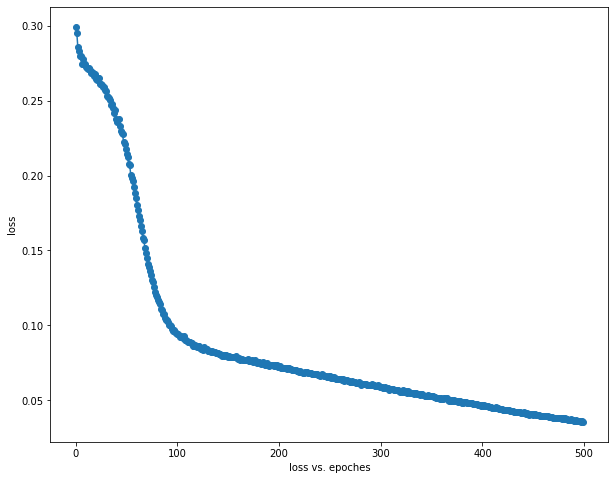

In [0]:
import matplotlib.pyplot as plt
x1 = range(0, 500)
y1 = loss_list
plt.figure(figsize=(10,8))
plt.plot(x1, y1, 'o-')
plt.xlabel('loss vs. epoches')
plt.ylabel('loss')
plt.show()

In [0]:
loss_list = []
for epoch in range(500):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, ele in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        seq, eff = ele
#         print(ele)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(seq)
#         print("outputs", outputs, "eff", eff)
        loss = criterion(outputs[:, 0], eff)
#         print("loss", loss)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    loss_list.append(running_loss)
    print("Epoch {} ,loss: {}".format(epoch, running_loss))
    
print('Finished Training')
# train_time[8] = time.time() - now

Epoch 0 ,loss: 0.29929796140640974
Epoch 1 ,loss: 0.29485380463302135
Epoch 2 ,loss: 0.28557412419468164
Epoch 3 ,loss: 0.28314624540507793
Epoch 4 ,loss: 0.2795324781909585
Epoch 5 ,loss: 0.2796620028093457
Epoch 6 ,loss: 0.274292110465467
Epoch 7 ,loss: 0.27797822654247284
Epoch 8 ,loss: 0.2740768473595381
Epoch 9 ,loss: 0.2744882870465517
Epoch 10 ,loss: 0.2725577373057604
Epoch 11 ,loss: 0.2716821553185582
Epoch 12 ,loss: 0.27118172217160463
Epoch 13 ,loss: 0.27193344943225384
Epoch 14 ,loss: 0.27052534464746714
Epoch 15 ,loss: 0.2686294708400965
Epoch 16 ,loss: 0.2689115460962057
Epoch 17 ,loss: 0.2681046826764941
Epoch 18 ,loss: 0.26656811498105526
Epoch 19 ,loss: 0.2676928108558059
Epoch 20 ,loss: 0.2646243432536721
Epoch 21 ,loss: 0.26384984981268644
Epoch 22 ,loss: 0.26536662597209215
Epoch 23 ,loss: 0.2650055596604943
Epoch 24 ,loss: 0.26119301188737154
Epoch 25 ,loss: 0.26088397204875946
Epoch 26 ,loss: 0.2603893522173166
Epoch 27 ,loss: 0.25874840654432774
Epoch 28 ,loss: 0

Epoch 227 ,loss: 0.06861498719081283
Epoch 228 ,loss: 0.0683160675689578
Epoch 229 ,loss: 0.06827567727304995
Epoch 230 ,loss: 0.06791411805897951
Epoch 231 ,loss: 0.0684597254730761
Epoch 232 ,loss: 0.06762637989595532
Epoch 233 ,loss: 0.06758772605098784
Epoch 234 ,loss: 0.06750454287976027
Epoch 235 ,loss: 0.06738240760751069
Epoch 236 ,loss: 0.06786999199539423
Epoch 237 ,loss: 0.06737623899243772
Epoch 238 ,loss: 0.06720747682265937
Epoch 239 ,loss: 0.06694367225281894
Epoch 240 ,loss: 0.06630370952188969
Epoch 241 ,loss: 0.06670360150747001
Epoch 242 ,loss: 0.06755596492439508
Epoch 243 ,loss: 0.06679461058229208
Epoch 244 ,loss: 0.06634578085504472
Epoch 245 ,loss: 0.06607102509588003
Epoch 246 ,loss: 0.06622298806905746
Epoch 247 ,loss: 0.06546626542694867
Epoch 248 ,loss: 0.06556126498617232
Epoch 249 ,loss: 0.06591902766376734
Epoch 250 ,loss: 0.066013423493132
Epoch 251 ,loss: 0.06499319081194699
Epoch 252 ,loss: 0.06558721326291561
Epoch 253 ,loss: 0.0650163593236357
Epoch 

Epoch 448 ,loss: 0.04112523247022182
Epoch 449 ,loss: 0.040565882925875485
Epoch 450 ,loss: 0.04039197834208608
Epoch 451 ,loss: 0.040597476065158844
Epoch 452 ,loss: 0.040678031742572784
Epoch 453 ,loss: 0.04049513931386173
Epoch 454 ,loss: 0.04002837720327079
Epoch 455 ,loss: 0.04033830750267953
Epoch 456 ,loss: 0.04016569769009948
Epoch 457 ,loss: 0.039789395523257554
Epoch 458 ,loss: 0.039784051827155054
Epoch 459 ,loss: 0.03953530534636229
Epoch 460 ,loss: 0.0396018628962338
Epoch 461 ,loss: 0.039427399169653654
Epoch 462 ,loss: 0.039515018463134766
Epoch 463 ,loss: 0.03935017832554877
Epoch 464 ,loss: 0.039277659147046506
Epoch 465 ,loss: 0.03911176370456815
Epoch 466 ,loss: 0.0390810085227713
Epoch 467 ,loss: 0.03907993796747178
Epoch 468 ,loss: 0.038852586527355015
Epoch 469 ,loss: 0.03851015749387443
Epoch 470 ,loss: 0.03853805689141154
Epoch 471 ,loss: 0.03824052319396287
Epoch 472 ,loss: 0.03845958167221397
Epoch 473 ,loss: 0.03808362199924886
Epoch 474 ,loss: 0.038142305449